# Generating Training Data

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import math
import random

In [3]:
functions = [lambda x : x, 
             lambda x : 101 - x,
             lambda x : 50.5 + 49.5 * math.sin(math.pi / 2 + x / (5 * math.pi)),
             lambda x : random.randint(1, 101)]

In [4]:
points = []
xs = []
ys = []
for i in range(50):
    x = random.randint(1,101)
    y = functions[2](x)
#     print(x, y)
    points.append((x,y))
    xs.append(x)
    ys.append(y)

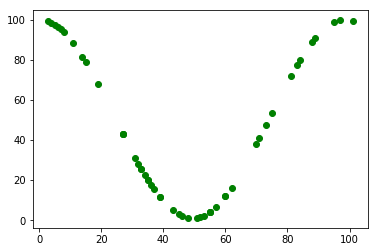

In [5]:
plt.figure()
plt.scatter(xs, ys, color="green")

In [6]:
def plot_function(func_num, plot=True):
    """
    Plot 50 (x,y) pairs for given function
    """
    points = []
    xs = []
    ys = []
    colors = ['maroon', 'blue', 'green', 'orange']
    for i in range(50):
        x = random.randint(1,101)
        y = functions[func_num](x)
    #     print(x, y)
        points.append((x,y))
        xs.append(x)
        ys.append(y)
    if plot:
        plt.figure()
        plt.scatter(xs, ys, color=colors[func_num])
    return (xs, ys)

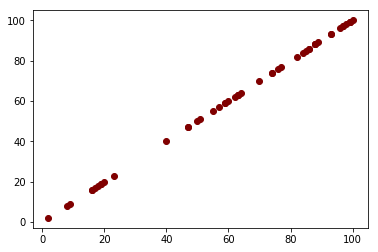

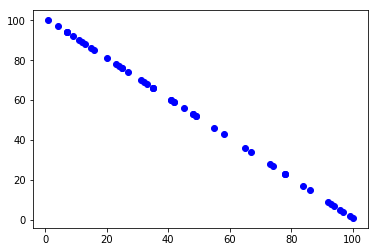

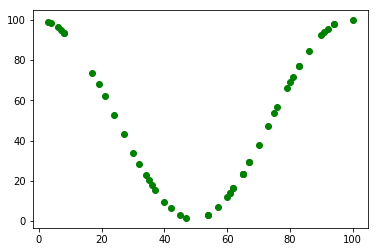

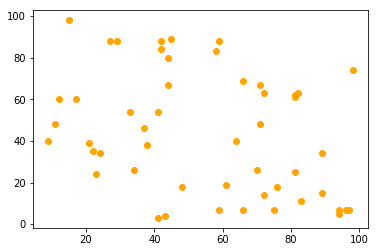

In [7]:
for i in range(4):
    plot_function(i)

In [8]:
def graph_normal(mu, sigma):
    # uncomment this code to graph the normal distribution 
    a = np.random.normal(mu, sigma, 1000)
    count, bins, ignored = plt.hist(a, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
             linewidth=2, color='r')
    plt.show()

In [9]:
# mu, sigma = 0, 1 # mean and standard deviation
a = np.random.normal(1, 1, 1000)
b = np.random.normal(0, 1, 1000)

In [18]:
asum= 0
for i in range(25):
    asum += a[random.randint(0,len(a)-1)]
print(asum/25)

1.0834774641431633


# Model for Generations

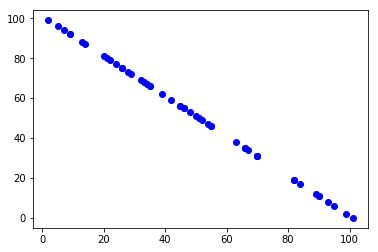

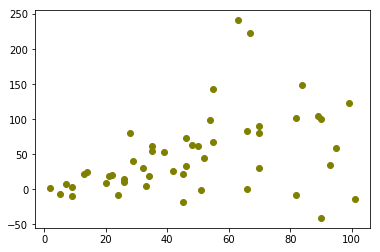

In [11]:
# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

new_x = []
new_y = []
for i in range(50):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    bag_x.append(x)
    bag_y.append(y)

    mu = a[random.randint(0,len(a)-1)] * x + b[random.randint(0,len(b)-1)]
    
    sigma = 0.001
    
    y = np.random.normal(mu, sigma, 1000)
    y = y[random.randint(0,len(y)-1)]
    
#     # alternative method to sample from normal
#     y = mu + np.random.normal() * sigma
    
    new_x.append(x)
    new_y.append(y)

# graph after one generation

plt.figure()
plt.scatter(new_x, new_y, color="#808000")

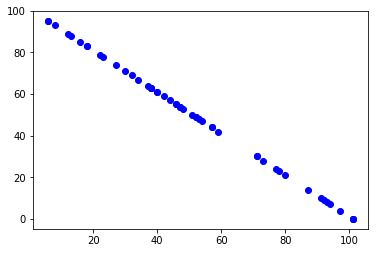

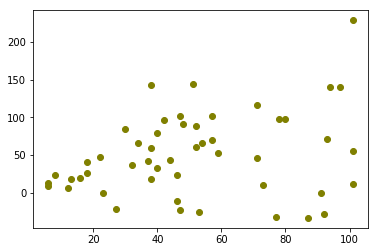

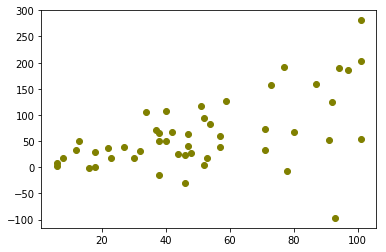

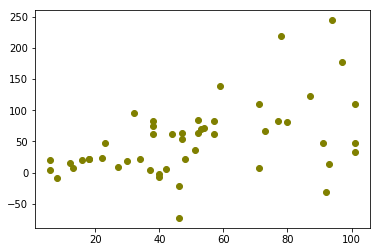

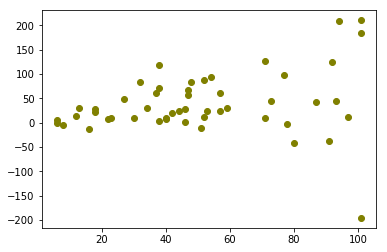

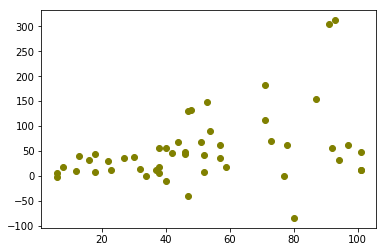

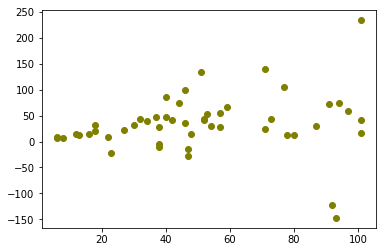

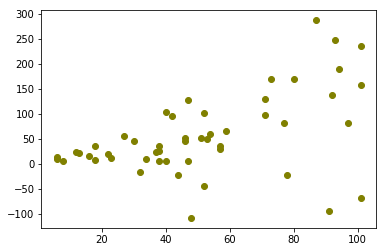

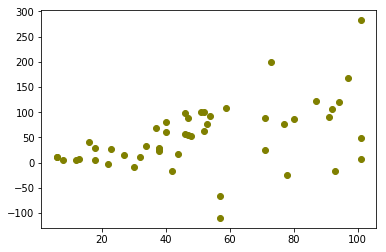

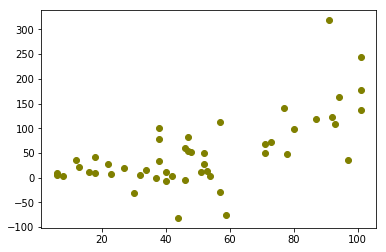

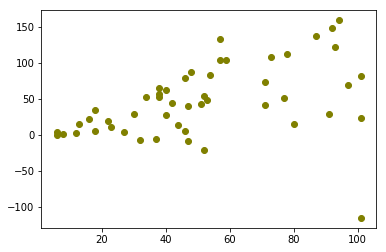

In [12]:
#### for multiple generations


# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

for i in range(10):
    
#     print(xs, ys)
    
    new_x = []
    new_y = []
    for i in range(50):
#         ind = random.randint(0, len(xs)-1)
#         x = xs.pop(ind)
#         y = ys.pop(ind)
        
        x = xs[i]
        y = ys[i]

        bag_x.append(x)
        bag_y.append(y)

        mu = a[random.randint(0,len(a)-1)] * x + b[random.randint(0,len(b)-1)]

        sigma = 0.001

        y = np.random.normal(mu, sigma, 1000)
        y = y[random.randint(0,len(y)-1)]

    #     # alternative method to sample from normal
    #     y = mu + np.random.normal() * sigma

        new_x.append(x)
        new_y.append(y)

    # graph after one generation

    plt.figure()
    plt.scatter(new_x, new_y, color="#808000")
    
    xs = new_x
    ys = new_y